# 11.Disparitná mapa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.color import rgb2gray
from tqdm.notebook import trange, tqdm
from skimage import io, feature, transform, data

plt.rcParams['font.size'] = 18

Na výpočet disparitnej mapy použijeme dáta motorky zo stereokamery.

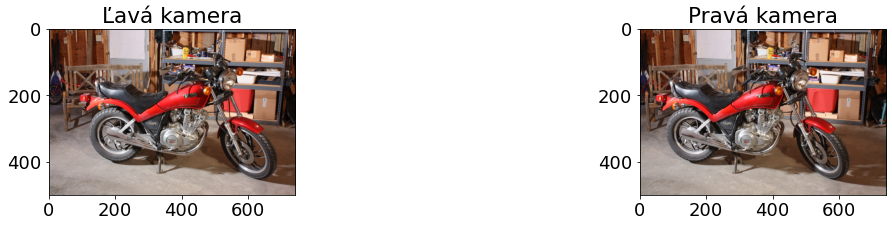

In [2]:
img_left, img_right, disparity = data.stereo_motorcycle()

plt.figure(figsize= (15, 10))
plt.subplot(131)
plt.title('Ľavá kamera')
plt.imshow(img_left)
# plt.subplot(132)
# plt.title('Disparita')
# plt.imshow(disparity)
plt.subplot(133)
plt.title('Pravá kamera')
plt.imshow(img_right)

img_right = rgb2gray(img_right)
img_left = rgb2gray(img_left);

Pomocou algoritmu hľadáme korešpondujúce pixely v obrázkoch na základe podobnosti ich okolia.
Pre malý výrez jedného obrázku sa snažíme nájsť najpodobnejší výrez v druhom obrázku.
Výrez, ktorý sa najviac podobá zapíšeme (jeho posunutie) do disparitnej mapy.

In [3]:
height, width = img_right.shape
dispMin = 0
dispMax = 16
windows_size = 5
dispMap = np.zeros((height, width))
w = windows_size // 2

In [6]:
def disparityMap(mode):
    for i in tqdm(range(w,height),'Row progress'):
        for j in range(w,width - dispMax - w):
            min_val = np.inf
            position = 0
            right_window = img_right[i-w:i+w,j-w:j+w]
            for k in range(dispMin, dispMax):
                left_window  = img_left[i-w:i+w,j-w+k :j+w+k]
                if mode == "norm":
                    dif = np.sum((left_window - right_window) **2) ** (1/2)
                elif mode == "abs":
                    dif = np.sum(np.abs(left_window - right_window))
                elif mode == "square":
                    dif = np.sum((left_window - right_window) **2)
                elif mode == "hamming":
                    xor = np.bitwise_xor((right_window*255).astype(np.uint8),
                                         (left_window*255).astype(np.uint8))
                    bit_dif = np.unpackbits(xor)
                    dif  = np.sum(bit_dif)
                if min_val > dif:
                    min_val = dif
                    position = k
            dispMap[i,j] = position;

Na výpočet disparitnej mapy je možné použiť rôzne metriky ako euklidovskú vzdialenosť, sumu absolutných odchyliek, sumu kvadratických odchyliek alebo Hammingovú vzdialenosť.

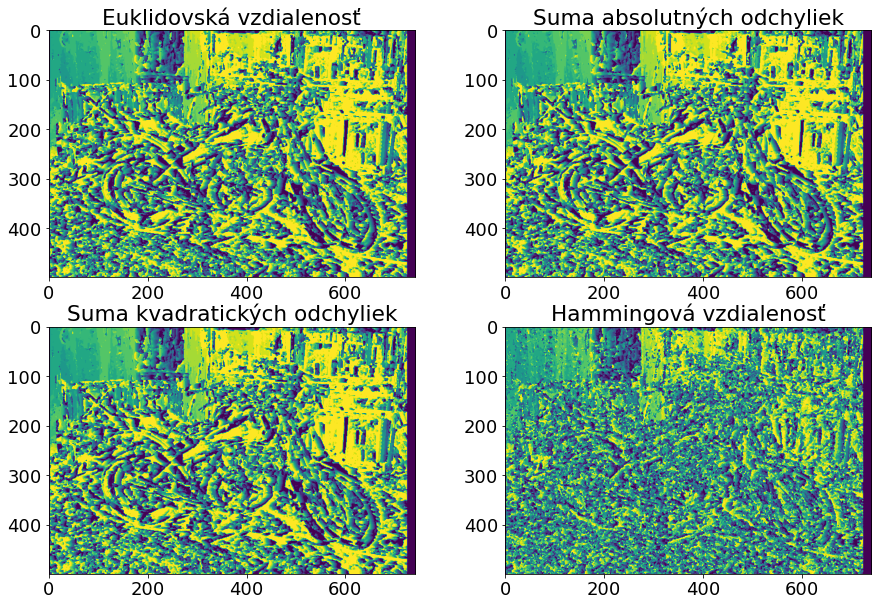

In [7]:
plt.figure(figsize= (15, 10))
plt.subplot(221)
plt.title("Euklidovská vzdialenosť")
disparityMap("norm")
plt.imshow(dispMap)

plt.subplot(222)
plt.title("Suma absolutných odchyliek")
disparityMap("abs")
plt.imshow(dispMap)

plt.subplot(223)
plt.title("Suma kvadratických odchyliek")
disparityMap("square")
plt.imshow(dispMap)

plt.subplot(224)
plt.title("Hammingová vzdialenosť")
disparityMap("hamming")
plt.imshow(dispMap);

# Úloha:
Pomocou detektora hrán, napr. cannyho:
rightImage = edge(img_right,'canny',[0.00 0.001]);
preveďte obrázky na binárne.
Pokúste sa na určenie podobnosti výrezov použiť princíp, ktorý sme použili na vyhľadávanie vzoru v kapitolách Konvolúcia alebo Fourierova transformácia, zvážte
výhody a nevýhody tohto prístupu.
